<a href="https://colab.research.google.com/github/MarcoC87/DataAnalytics/blob/main/MachineLearning/Regression/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
import numpy as np
import matplotlib.pyplot as plt

In [361]:
# Generate data (2 features example)

x_min = 0
x_max = 1000
N = 1000

x1 = np.random.uniform(x_min, x_max, size=N)
x2 = np.random.uniform(x_min, x_max, size=N)

X = np.column_stack((x1, x2)) # create (N * 2) array
y = 2*X[:,0] + X[:,1] + 5 + 200*np.random.randn(N)


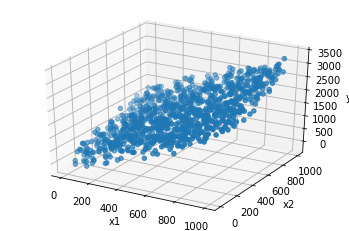

In [362]:
# Plot data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y)

plt.show()

**How to find the line of best fit?**

Now $x_i$ contains multiple features so $\hat{y}_i$ will be given by

$\hat{y}_i = w_0 + w_1 x_{i1} + ... + w_D x_{iD} = w^{T}x_i$

where D is number of features.

In matrix form

$\hat{y}_{N\times 1} = X_{N \times D} w_{D \times 1}$

where N is the number of samples.
\begin{align}
\begin{bmatrix}
y_1\\
.\\
.\\
.\\
y_N 
\end{bmatrix}
=
\begin{bmatrix}
x_{11}&.&.&.&x_{1D}\\
.&.&.&.&.\\
.&.&.&.&.\\
.&.&.&.&.\\
x_{N1}&.&.&.&x_{ND}
\end{bmatrix}
\begin{bmatrix}
w_1\\
.\\
.\\
.\\
w_D 
\end{bmatrix}
\end{align}

we want to minimize the cost function (mean squared error)

$E = \frac{1}{N}\sum_i(y_i - \hat{y}_i)^2 = \frac{1}{N}\sum_i(y_i - w^{T}x_i)^2$


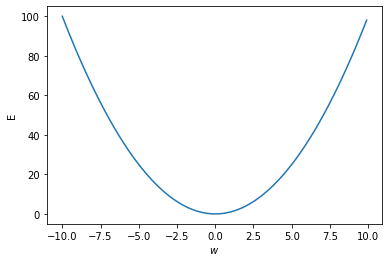

#### 1. **Calculating analytical solution with NumPy**

We can find the exact solution by solving

$\frac{\partial E}{\partial w_j} = \sum_i 2(y_i - w^T x_{ij})(-x_{ij}) = 0,\;\;\; j=1,...,D$

...obtaining

$w = (X^T X)^{-1} X^T y$

In [363]:
# Numpy has a special function to solve linear equations
# Ax = b --> x = np.linalg.solve(A, b)

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

In [364]:
# predict the result for (x1=5, x2=50)
np.array([[50, 50]]).dot(w)

array([150.65237674])

In [365]:
y_pred = X.dot(w)
y_pred[:5]

array([2703.72249445,  709.23898029,  798.26095838, 1408.59717602,
       2418.05122371])

In [366]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9092444288975405

#### 2. **Using Scikit-Learn**

In [367]:
from sklearn.linear_model import LinearRegression

# train the linear model
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [368]:
# calculate R^2
reg.score(X, y)

0.9093537171786731

In [369]:
y_pred = reg.predict(X)
y_pred[:5]

array([2693.62819032,  720.72671249,  809.00453533, 1410.17895507,
       2410.43271099])

In [370]:
r2_score(y, y_pred)

0.9093537171786731

#### 3. **Using statsmodels**

In [371]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     5001.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:12:59   Log-Likelihood:                -6708.0
No. Observations:                1000   AIC:                         1.342e+04
Df Residuals:                     997   BIC:                         1.344e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6084     16.973      1.096      0.273     -14.698      51.915
x1             1.9894      0.022     90.896      0.000       1.946       2.032
x2             0.9915      0.022     45.213      0.000       0.948       1.035
==============================================================================
Omnibus:                        1.658   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.577
Skew:                          -0.012   Prob(JB):                        0.454
Kurtosis:                       2.807   Cond. No.                     2.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
y_pred = results.predict(X1)
y_pred[:5]

array([2693.62819032,  720.72671249,  809.00453533, 1410.17895507,
       2410.43271099])

In [373]:
r2_score(y, y_pred)

0.9093537171786731

##### **Adding a new (random) feature...**

In [374]:
X.shape

(1000, 2)

In [375]:
random_column = np.random.choice([20, 30, 40], size=len(X)).reshape(-1,1)

In [376]:
random_column.shape

(1000, 1)

In [377]:
X = np.hstack((X, random_column.reshape(-1,1)))

In [378]:
X[:5]

array([[907.65753832, 876.79858523,  30.        ],
       [263.83800106, 178.76525601,  40.        ],
       [306.37909963, 182.44449038,  30.        ],
       [342.2891291 , 716.7153453 ,  20.        ],
       [776.67423634, 853.98319042,  20.        ]])

In [379]:
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     3331.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:12:59   Log-Likelihood:                -6708.0
No. Observations:                1000   AIC:                         1.342e+04
Df Residuals:                     996   BIC:                         1.344e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1679     28.396      0.886      0.376     -30.556      80.891
x1             1.9894      0.022     90.855      0.000       1.946       2.032
x2             0.9914      0.022     45.178      0.000       0.948       1.034
x3            -0.2205      0.765     -0.288      0.773      -1.722       1.281
==============================================================================
Omnibus:                        1.691   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.604
Skew:                          -0.013   Prob(JB):                        0.448
Kurtosis:                       2.805   Cond. No.                     3.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""